In [1]:
from google.colab import files
  
  
uploaded = files.upload()

Saving loan.csv to loan.csv


In [2]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Load the CSV file

In [63]:
loan = pd.read_csv("loan.csv")

**Check the file shape how many row and columns in csv file**

In [4]:
loan.shape

(39717, 111)

In [64]:
loan.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.00,0.00,5632.210000,5632.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

**Check the null values in columns have**

In [6]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.0000

**Data Cleaning and missing value handle**

Find the percentage of missing values in each column in csv file

In [8]:
percent_nullvalues = loan.isnull().sum() * 100 / len(loan)
print(percent_nullvalues)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64


create a new dataframe which include column name and their null value perncentage

In [9]:
nullvalue_df = pd.DataFrame({'columns_name': loan.columns,
                                 'percent_nullvalues': percent_nullvalues.round()})
print(nullvalue_df)

                                          columns_name  percent_nullvalues
id                                                  id                 0.0
member_id                                    member_id                 0.0
loan_amnt                                    loan_amnt                 0.0
funded_amnt                                funded_amnt                 0.0
funded_amnt_inv                        funded_amnt_inv                 0.0
...                                                ...                 ...
tax_liens                                    tax_liens                 0.0
tot_hi_cred_lim                        tot_hi_cred_lim               100.0
total_bal_ex_mort                    total_bal_ex_mort               100.0
total_bc_limit                          total_bc_limit               100.0
total_il_high_credit_limit  total_il_high_credit_limit               100.0

[111 rows x 2 columns]


counting the null value which have 100.0% null value coantain  

In [10]:
(nullvalue_df['percent_nullvalues'] == 100.0).sum()

54

List of columns having NULL values

In [11]:
nullvalue_df_columns = nullvalue_df[(nullvalue_df['percent_nullvalues'] == 100.00)].columns_name.tolist()
print(nullvalue_df_columns)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

Confirming the list which is equal to above count and it must be same

In [12]:
print(len(nullvalue_df_columns))

54


In [13]:
inp1 = loan.drop(nullvalue_df_columns, axis=1)
print(inp1)

            id  member_id  ...  pub_rec_bankruptcies  tax_liens
0      1077501    1296599  ...                   0.0        0.0
1      1077430    1314167  ...                   0.0        0.0
2      1077175    1313524  ...                   0.0        0.0
3      1076863    1277178  ...                   0.0        0.0
4      1075358    1311748  ...                   0.0        0.0
...        ...        ...  ...                   ...        ...
39712    92187      92174  ...                   NaN        NaN
39713    90665      90607  ...                   NaN        NaN
39714    90395      90390  ...                   NaN        NaN
39715    90376      89243  ...                   NaN        NaN
39716    87023      86999  ...                   NaN        NaN

[39717 rows x 57 columns]


check the null values again

In [14]:
inp1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Now we will do same process to remove a null columns

In [15]:
per2 = inp1.isnull().sum() * 100 / len(loan)
print(per2)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [16]:
nullvalue2 = pd.DataFrame({'new_columns_name': inp1.columns,
                                 'new_percent_nullvalues': per2.round(2)})
print(nullvalue2)

                                      new_columns_name  new_percent_nullvalues
id                                                  id                    0.00
member_id                                    member_id                    0.00
loan_amnt                                    loan_amnt                    0.00
funded_amnt                                funded_amnt                    0.00
funded_amnt_inv                        funded_amnt_inv                    0.00
term                                              term                    0.00
int_rate                                      int_rate                    0.00
installment                                installment                    0.00
grade                                            grade                    0.00
sub_grade                                    sub_grade                    0.00
emp_title                                    emp_title                    6.19
emp_length                                  emp_leng

In [17]:
(nullvalue2['new_percent_nullvalues'] > 0.00).sum()

14

In [18]:
nullvalue_new_columns = nullvalue2[(nullvalue2['new_percent_nullvalues'] > 0.00)].new_columns_name.tolist()
print(nullvalue_new_columns)

['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


In [19]:
print(len(nullvalue_new_columns))

14


All null values columns removed and assigned into new variable

In [20]:
inp2 = inp1.drop(nullvalue_new_columns, axis=1)
print(inp2)

            id  member_id  ...  acc_now_delinq  delinq_amnt
0      1077501    1296599  ...               0            0
1      1077430    1314167  ...               0            0
2      1077175    1313524  ...               0            0
3      1076863    1277178  ...               0            0
4      1075358    1311748  ...               0            0
...        ...        ...  ...             ...          ...
39712    92187      92174  ...               0            0
39713    90665      90607  ...               0            0
39714    90395      90390  ...               0            0
39715    90376      89243  ...               0            0
39716    87023      86999  ...               0            0

[39717 rows x 43 columns]


In [21]:
inp2.shape

(39717, 43)

Now the new data set does not contain any null values

In [22]:
inp2.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int 

In [23]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [24]:
inp2.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,11,f,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,1,INDIVIDUAL,0,0


Count the value of loan_status because we don't need the current status because these candidates are not labelled as 'defaulted'

In [25]:
inp2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [26]:
inp2[inp2['loan_status'] == "Current"]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.0,0.0,0.0,67.79,1,INDIVIDUAL,0,0
32,1065420,1299514,10000,10000,9975.00000,60 months,15.96%,242.97,C,C5,RENT,29120.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,22.83,0,Feb-97,1,11,0,16158,31,f,1849.10,1844.43,12594.24,12562.85,8150.89,4443.35,0.0,0.0,0.0,242.97,1,INDIVIDUAL,0,0
39,1069346,1304237,12500,12500,12475.00000,60 months,12.69%,282.44,B,B5,RENT,27000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,604xx,IL,16.04,0,Dec-01,3,6,0,10143,24,f,2181.42,2177.03,14636.30,14607.08,10318.58,4317.72,0.0,0.0,0.0,282.44,1,INDIVIDUAL,0,0
86,1063958,1297940,14000,14000,13975.00000,60 months,17.27%,349.98,D,D3,RENT,28000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,992xx,WA,6.34,0,Jul-05,2,5,0,6986,10,f,2637.34,2632.59,18176.96,18144.59,11362.67,6814.29,0.0,0.0,0.0,349.98,1,INDIVIDUAL,0,0
95,1068575,1303001,15300,15300,15275.00000,60 months,22.06%,423.10,F,F4,RENT,85000.0,Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,226xx,VA,20.58,0,Feb-84,2,14,0,26524,27,f,3125.79,3120.68,21988.20,21952.28,12174.21,9813.99,0.0,0.0,0.0,423.10,1,INDIVIDUAL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,725556,920821,10400,10400,10400.00000,60 months,6.00%,218.99,E,E3,MORTGAGE,29000.0,Source Verified,May-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,799xx,TX,10.84,0,Nov-02,0,7,0,8696,15,f,238.82,238.82,13886.92,13886.92,10161.18,3725.74,0.0,0.0,0.0,218.99,1,INDIVIDUAL,0,0
15981,738420,935790,6000,6000,6000.00000,60 months,10.37%,128.58,B,B3,RENT,24000.0,Source Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,car,142xx,NY,11.05,0,Oct-05,0,6,0,12,9,f,10.26,10.26,7701.15,7701.15,5989.74,1711.41,0.0,0.0,0.0,128.58,1,INDIVIDUAL,0,0
16361,733695,930086,19200,19200,18847.76292,60 months,10.74%,414.97,B,B4,MORTGAGE,100000.0,Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,071xx,NJ,4.43,0,Jan-91,0,6,0,0,10,f,19.12,19.09,24894.24,24310.75,19180.88,5713.36,0.0,0.0,0.0,414.97,1,INDIVIDUAL,0,0
16609,728422,924106,9350,9350,9350.00000,60 months,10.00%,198.66,B,B2,RENT,66000.0,Not Verified,Apr-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,car,103xx,NY,4.84,0,Dec-01,0,4,0,88,7,f,13.28,13.28,11906.14,11906.14,9336.72,2569.42,0.0,0.0,0.0,198.66,1,INDIVIDUAL,0,0


In [27]:
inp2 = inp2[inp2['loan_status'] != "Current"]
inp2.shape

(38577, 43)

Here we removed 'Loan_status' value is current because we don't need that

In [28]:
inp2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Here we remove the current loan status raw

In [29]:
inp2['total_rec_late_fee'].value_counts()

0.000000     36582
15.000000      245
15.000000       58
30.000000       52
15.000000       47
             ...  
44.840000        1
16.010000        1
29.914662        1
23.820000        1
17.165009        1
Name: total_rec_late_fee, Length: 1320, dtype: int64

In [30]:
inp2['acc_now_delinq'].value_counts()

0    38577
Name: acc_now_delinq, dtype: int64

In [31]:
inp2['delinq_amnt'].value_counts()

0    38577
Name: delinq_amnt, dtype: int64

In [32]:
inp2['recoveries'].value_counts()

0.00      34359
10.40         4
11.29         4
19.20         3
13.59         3
          ...  
240.15        1
385.70        1
995.74        1
176.49        1
269.31        1
Name: recoveries, Length: 4040, dtype: int64

In [33]:
inp2['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

Remove this column because it is not required

In [34]:
inp2= inp2.drop(["acc_now_delinq", "delinq_amnt", "url"], axis=1)
inp2.shape

(38577, 40)

In [35]:
inp2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL


In [36]:
inp2['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
17.34%      1
22.64%      1
14.67%      1
17.46%      1
16.15%      1
Name: int_rate, Length: 370, dtype: int64

Here we remove "%" from int_rate because we don't need this for analysis

In [37]:
inp2['int_rate'] = inp2['int_rate'].replace({'\%' : ''},regex = True).astype(float)
inp2['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [38]:
inp2.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,17726,11,f,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,1,INDIVIDUAL
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,car,900xx,CA,5.35,0,Jan-07,2,4,0,8221,4,f,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,111.34,1,INDIVIDUAL


In [39]:
inp2.shape

(38577, 40)

**Univariate Analysis**

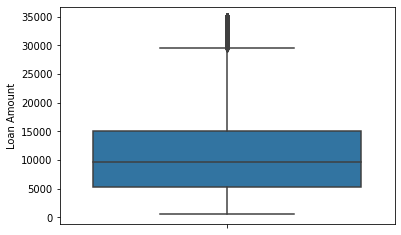

In [40]:
sns.boxplot( y=inp2["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

Here the loan amount varies from 0 to 35,000 and 25% is 5000, 50% is nearly equal to 10000 and 75% is 15000 and the outliers is above 30000

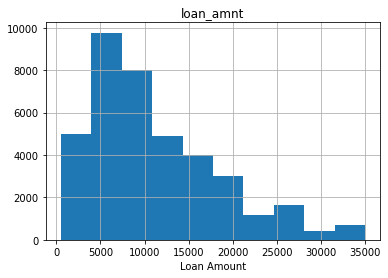

In [41]:
inp2.hist(column='loan_amnt', grid= True);
plt.xlabel('Loan Amount')
plt.show()

Here the histogram show that most of the loan amount is 5000

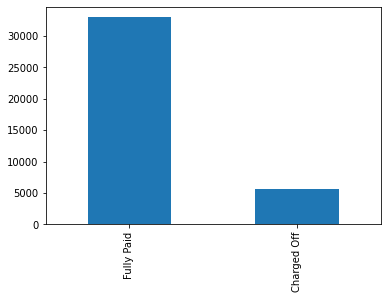

In [42]:
inp2['loan_status'].value_counts().plot.bar()
plt.show()

here bar plot show the loan_status is mostly fully paid

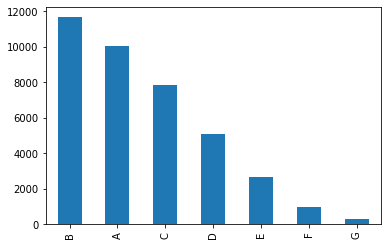

In [43]:
inp2['grade'].value_counts().plot.bar()
plt.show()

here bar plot show the grade is majorly is 'B'

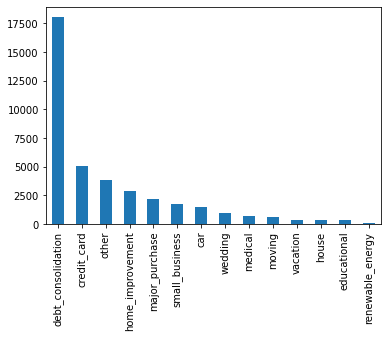

In [44]:
inp2['purpose'].value_counts().plot.bar()
plt.show()

here bar plot show the purpose is majorly people take a loan for  'debt_consolidation'

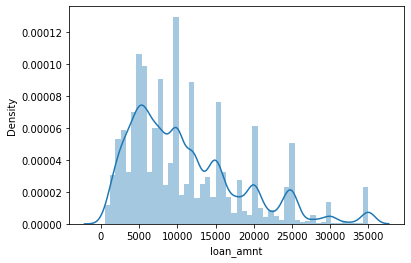

In [45]:
sns.distplot(inp2['loan_amnt'])
plt.show()

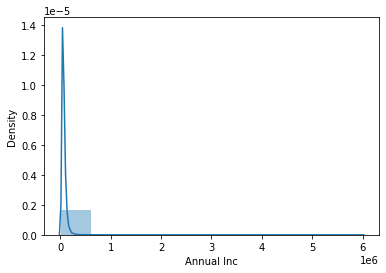

In [46]:
sns.distplot(inp2['annual_inc'], bins=10)
plt.xlabel('Annual Inc')
plt.show()

here we observ the major people annual income in between 0 to 1

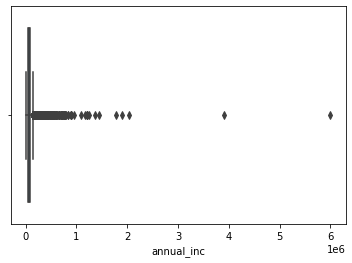

In [47]:
sns.boxplot(x=inp2['annual_inc'])
plt.xlabel('annual_inc')
plt.show()

Here only 5 people annual_inc is above 1.5

Segmented Univariate Analysis

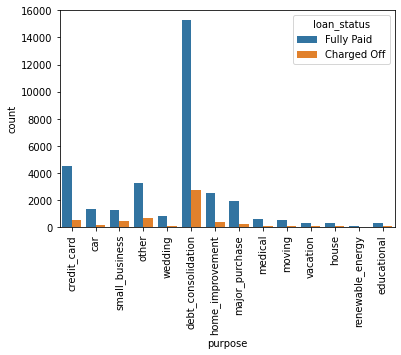

In [48]:
sns.countplot(x='purpose', hue="loan_status", data=inp2)
plt.xticks(rotation=90)
plt.show()

here we can so that fully paid and charged off both are take the loan for 'debt_consolidation' purpose

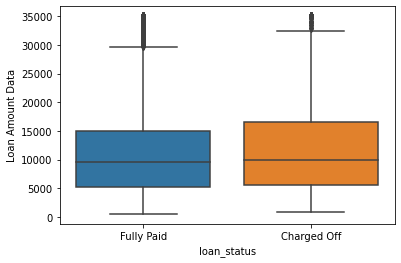

In [49]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=inp2)
plt.ylabel('Loan Amount Data')
plt.show()

here we show both loan_status mean value is all most equal but outliers is different for fully paid is above 30000 and charged off above 32000

In [50]:
inp2['term_months_digit'] = inp2['term'].str.rstrip('months')
del inp2['term']

here we need the term column and it also have months so we remove the term column and store months digits in new column

In [51]:
inp2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,term_months_digit
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,36
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,60
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,36
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,36
5,1075269,1311441,5000,5000,5000.0,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,36


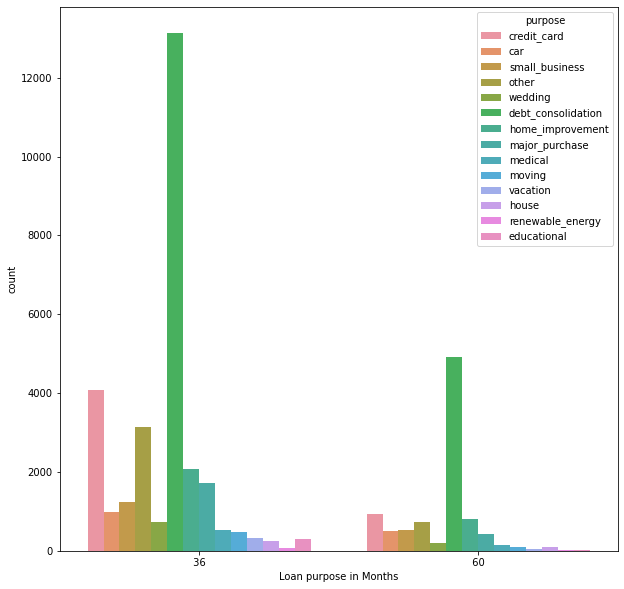

In [52]:
plt.figure(figsize=(10,10))
sns.countplot( x="term_months_digit", hue='purpose', data=inp2)
plt.xlabel('Loan purpose in Months')
plt.show()

Here we can see mostly loan generte in 36 months

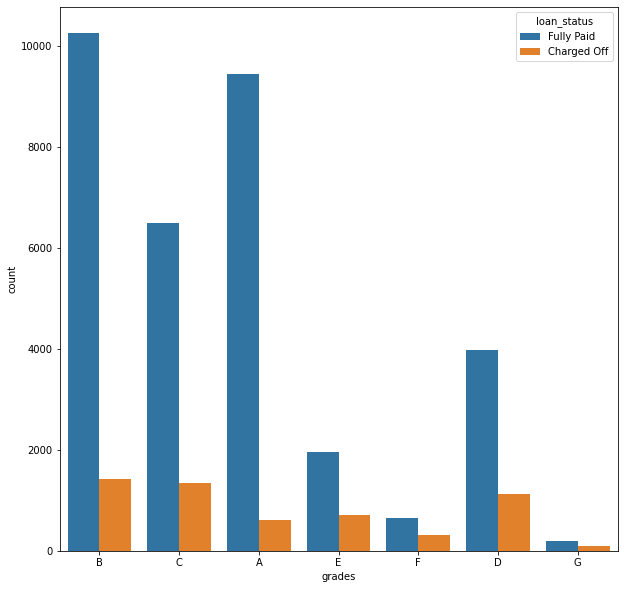

In [53]:
plt.figure(figsize=(10,10))
sns.countplot( x="grade", hue='loan_status', data=inp2)
plt.xlabel('grades')
plt.show()

Fully paid or charged off both are mostly preffer grades (B,A,C)

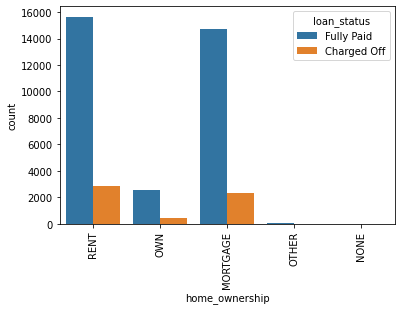

In [54]:
sns.countplot(x='home_ownership',hue='loan_status', data=inp2)
plt.xticks(rotation=90)
plt.show()

Rented or mortgage home people is taking more loan

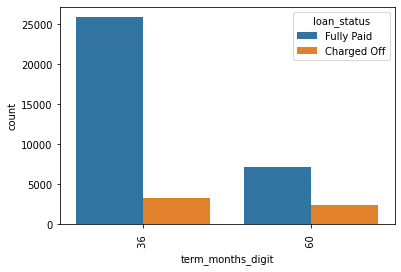

In [55]:
sns.countplot(x='term_months_digit',hue='loan_status', data=inp2)
plt.xticks(rotation=90)
plt.show()

Bivariate Plots

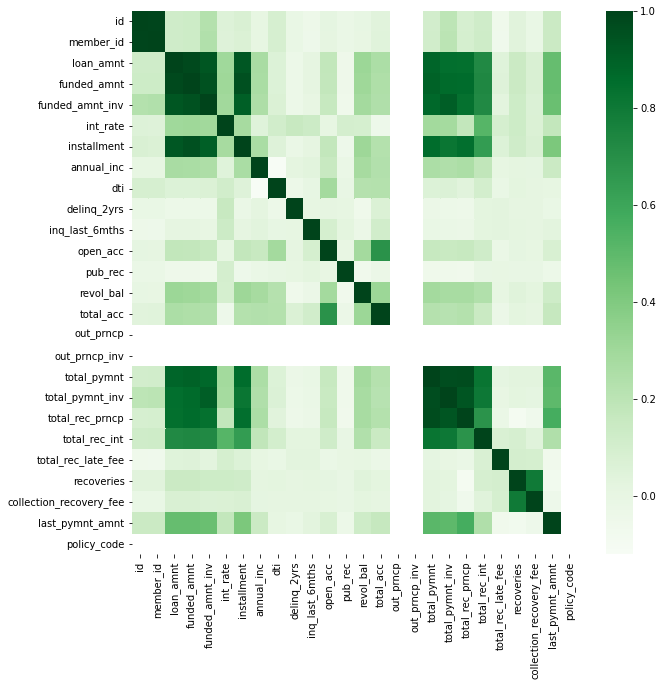

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(inp2.corr(), cmap="Greens")
plt.show()

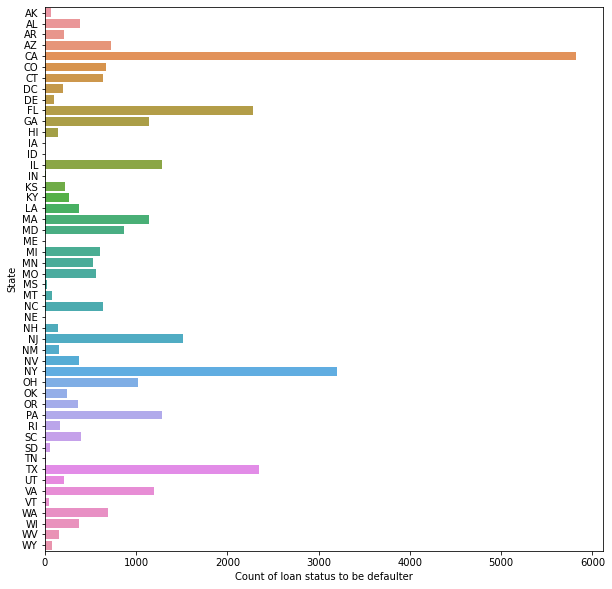

In [57]:
g = inp2[inp2['loan_status']=='Fully Paid'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

CA "add_state" peopel are high defulters

In [58]:
inp2['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [59]:
inp2_avg = inp2[inp2['funded_amnt'] <= 7090].groupby(['loan_status'])['funded_amnt'].count().reset_index()

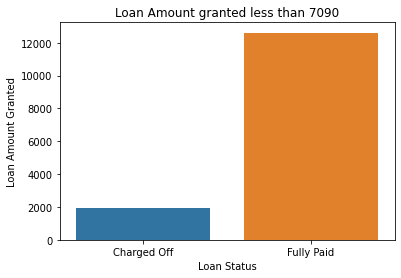

In [60]:
sns.barplot(x='loan_status', y='funded_amnt', data=inp2_avg)
plt.title('Loan Amount granted less than 7090')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [61]:
inp2_avg = inp2[inp2['funded_amnt'] >= 7090].groupby(['loan_status'])['funded_amnt'].count().reset_index()

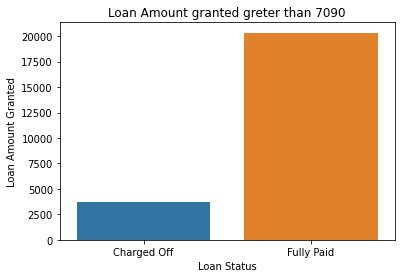

In [62]:
sns.barplot(x='loan_status', y='funded_amnt', data=inp2_avg)
plt.title('Loan Amount granted greter than 7090')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()